In [1]:
# 明日切忌直接运行模型

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [4]:
# https://github.com/JustGlowing/minisom

In [5]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# https://tslearn.readthedocs.io/en/stable/index.html

In [7]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install tslearn
! pip uninstall scikit-learn --yes 
! pip install scikit-learn==0.24.1

Found existing installation: scikit-learn 1.1.1
Uninstalling scikit-learn-1.1.1:
  Successfully uninstalled scikit-learn-1.1.1
  Using cached scikit_learn-0.24.1-cp39-cp39-manylinux2010_x86_64.whl (23.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pysal 2.4.0 requires urllib3>=1.26, but you have urllib3 1.25.11 which is incompatible.
imbalanced-learn 0.9.1 requires scikit-learn>=1.1.0, but you have scikit-learn 0.24.1 which is incompatible.


In [9]:
! pip install rfpimp -q

In [10]:
# Native libraries
import os
import math
import warnings

# Essential Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Algorithms
from minisom import MiniSom

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from tqdm.autonotebook import tqdm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GroupKFold, cross_val_predict
import statsmodels.api as sm


warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

SEED=23


/tmp/ipykernel_67/4243331885.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [37]:
s_2 = pd.read_csv('3_future_count_complete.csv')
cluster_label = pd.read_csv('4_time_series_clusters_label.csv')
#time_feature_label = pd.read_csv('4_time_weekday_month_clustering.csv')
time_feature_cluster = pd.read_csv('4_time_feature_clustering.csv')
time_high_frequency = pd.read_csv('4_time_highfrequency.csv')
time_feature_cluster_NOT_DUMMY = pd.read_csv('4_time_feature_NOT_DUMMY.csv')

s_2 = s_2.merge(cluster_label, right_on = 'LSOA',left_on = 'LSOA_2011_Name')
#s_2 = s_2.merge(time_feature_label[['KMeans']], left_index = True, right_index = True)
s_2 = s_2.merge(time_high_frequency , left_index = True, right_index = True)
s_2 = s_2.merge(time_feature_cluster_NOT_DUMMY , left_index = True, right_index = True)
s_2 = s_2.drop(columns = ['Unnamed: 0_y'])

In [38]:
s_2

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,index,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
0,0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1,10418,10418,11375,NC11376,15,10/29/2018,2018/19,Burglar/fire alarm,Noise Complaint,...,0,Westminster 018C,1,0,0,1,3,0,1,1
2,2,66,66,68,NC69,6,4/3/2018,2018/19,Burglar/fire alarm,Noise Complaint,...,0,Westminster 018C,2,0,0,1,3,0,1,1
3,3,84,84,90,NC91,20,4/3/2018,2018/19,Busker complaint,Noise Complaint,...,0,Westminster 018C,3,0,0,1,3,0,1,1
4,4,198,198,213,NC214,20,4/6/2018,2018/19,Busker complaint,Noise Complaint,...,0,Westminster 018C,4,0,0,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83736,83736,68145,68145,73797,NC73798,1,7/24/2021,2021/22,Residential noise,Noise Complaint,...,0,Westminster 024E,90793,0,0,1,4,4,1,0
83737,83737,68504,68504,74179,NC74180,13,7/30/2021,2021/22,Noise in the street,Noise Complaint,...,0,Westminster 024E,90794,0,0,1,4,4,1,0
83738,83738,68792,68792,74486,NC74487,9,8/4/2021,2021/22,Building site,Noise Complaint,...,0,Westminster 024E,90795,0,0,1,4,4,1,0
83739,83739,74441,74441,80518,NC80519,20,11/1/2021,2021/22,Residential noise,Noise Complaint,...,0,Westminster 024E,90796,0,0,1,4,4,1,0


In [39]:
s_2 = s_2.sort_values(by ='index').set_index('index')
s_2

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90793,32197,83736,83736,NC90794,22,5/24/2022,2022/23,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013A,35475,1,0,0,13,7,0,0
90794,52425,83737,83737,NC90795,23,5/24/2022,2022/23,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 017C,57002,0,0,0,11,8,1,1
90795,7498,83738,83738,NC90796,23,5/24/2022,2022/23,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 011E,8175,0,1,0,8,10,0,1


In [13]:
s_2 = s_2.sort_values(by ='index').set_index('index').loc[0:88298]
s_2


,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [14]:
s_2.to_csv('4_0717_record.csv')

In [15]:
for i in s_2 .columns:
    print(i +',')

Unnamed: 0_x,
Unnamed: 0.1,
Unnamed: 0.1.1,
Noise_Complaint_Index,
Time,
Received_Date,
Financial_Year,
Service_Request,
Service_Request_Group_Type,
Service_Request_Group_Sub_Type,
Service_Request_1,
Address_Key_,
Type_of_Address,
Output_Area_Code_(2011),
MSOA_2011_Code,
MSOA_2011_Name,
LSOA_2011_Code,
LSOA_2011_Name,
Ward_Name,
Date,
Days,
Year_Month,
Year_Week,
Year,
Month,
Weekday,
Season,
days,
is_repeat_2days,
is_repeat_7days,
is_repeat_30days,
2days_count,
7days_count,
30days_count,
bef_todays_count,
bef_yesterday_count,
bef_2_7days_count,
bef_7_30days_count,
bef_30_365days_count,
bef_365_begindays_count,
is_repeat_2_7days,
is_repeat_7_30days,
top5_lsoa_count,
LSOA_Count,
top5_address_count,
Adress_Count,
LSOA11CD,
cluster0,
cluster1,
cluster2,
is_high_hour,
is_high_weekday,
is_high_month,
is_lock_down,
Building Site,
Commercial Premises,
Email Complaint (1d),
Non Noise Complaint (45m),
Property Alarm,
Residential Premises,
Street,
year_month_cl_0,
year_month_cl_1,
year_month_cl_

In [16]:
s_2

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [24]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import rfpimp
from imblearn.over_sampling import SMOTE
from pprint import pprint

CPU times: user 15 µs, sys: 8 µs, total: 23 µs
Wall time: 24.3 µs


# Repeat complaint in next 2 days(today to tomorrow) 

In [25]:
# CV method to Tune the model

In [26]:
#  Defome the shift_dataset
shift_dataset = s_2.copy()

In [27]:
shift_dataset.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [36]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [32]:
shift_dataset.loc[shift_dataset.is_repeat_7_30days>0]

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
6,6047,6,6,NC7,3,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 008A,6526,0,0,1,7,8,1,0
10,5576,10,10,NC11,9,4/1/2018,2018/19,Building site,Noise Complaint,Building Site,...,0,Westminster 014G,6012,0,0,1,7,8,1,0
14,7102,14,14,NC15,11,4/1/2018,2018/19,Building site,Noise Complaint,Building Site,...,0,Westminster 011E,7722,0,0,1,7,8,1,0
17,12105,17,17,NC18,16,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 005F,13240,0,0,0,12,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88253,61327,81468,81468,NC88254,15,3/30/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 022D,66475,1,0,1,3,7,0,1
88265,39362,81480,81480,NC88266,21,3/30/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 004D,43161,1,1,1,4,11,0,1
88267,43492,81482,81482,NC88268,22,3/30/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 017F,47500,1,1,1,6,9,0,0


In [33]:
shift_dataset.loc[shift_dataset.is_repeat_2days>0]

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
7,6541,7,7,NC8,6,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 005B,7068,1,1,1,7,11,0,0
9,7091,9,9,NC10,9,4/1/2018,2018/19,Building site,Noise Complaint,Building Site,...,0,Westminster 011E,7707,1,0,1,7,7,1,0
15,8081,15,15,NC16,14,4/1/2018,2018/19,Busker complaint,Noise Complaint,Street,...,1,Westminster 011B,8805,1,0,0,9,7,1,1
19,14883,19,19,NC20,17,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 010F,16398,0,0,0,1,6,1,1
23,14884,23,23,NC24,19,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 010F,16399,0,0,0,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88273,77629,81486,81486,NC88274,2,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 008D,83924,0,0,0,0,0,1,1
88275,77630,81488,81488,NC88276,3,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 008D,83925,0,0,0,0,0,1,1
88276,33966,81489,81489,NC88277,4,3/31/2022,2021/22,Noise from commercial premises,Noise Complaint,Commercial Premises,...,0,Westminster 007G,37385,1,0,0,0,13,0,0


In [35]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [29]:
independent_and_LSOA_columns = [ 'Unnamed: 0.1',
                                
                                 'Year', 'Month', 'Weekday','Season', 'days','Time', 
                                'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
                                
                                'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
                                
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',
 ]

    
    # Select columns from different dimensions
independent_columns = [ 
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]


independent_columns_order = [ 'Unnamed: 0.1.1',
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]

In [30]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='not majority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(shift_dataset[independent_columns_order], shift_dataset['is_repeat_2days'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)



In [ ]:
oversampled

In [ ]:
#oversampled =oversampled.merge(shift_dataset[['Unnamed: 0_x','LSOA11CD']], left_on = 'Unnamed: 0_x', right_on = 'Unnamed: 0_x' )


In [ ]:


le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled['is_repeat_2days']) # runs LabelEncoder on the accident_count_levelcolumn

In [ ]:
shift_dataset_2_dict = oversampled[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024
index = oversampled.index.values

train_d, test_d, train_lab, test_lab, train_index, test_index = train_test_split(vec_array, label_y, index, random_state=random_state_split)
len(train_d),len(test_d),len(train_lab),len(test_lab),len(train_index),len(test_index)

In [ ]:
train_index

In [ ]:
train_d

In [43]:
oversampled_train = oversampled.loc[train_index].sort_values(by = 'Unnamed: 0.1.1' )
oversampled_train

KeyError: 'Unnamed: 0.1.1'

In [42]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled_train['is_repeat_2days']) # runs LabelEncoder on the accident_count_levelcolumn

shift_dataset_2_dict = oversampled_train[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024


#train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state=random_state_split)
#len(train_d),len(test_d),len(train_lab),len(test_lab)

NameError: name 'oversampled_train' is not defined

In [38]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = vec_array
y = label_y


TS_kfold = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

ts_kfold = TS_kfold.split(vec_array, label_y)  

train_indices, test_indices = [list(traintest) for traintest in zip(*ts_kfold)]

ts_cv = [*zip(train_indices,test_indices)]

In [39]:
ts_cv

[(array([    0,     1,     2, ..., 24085, 24086, 24087]),
  array([24088, 24089, 24090, ..., 48172, 48173, 48174])),
 (array([    0,     1,     2, ..., 48172, 48173, 48174]),
  array([48175, 48176, 48177, ..., 72259, 72260, 72261])),
 (array([    0,     1,     2, ..., 72259, 72260, 72261]),
  array([72262, 72263, 72264, ..., 96346, 96347, 96348]))]

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [41]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune

random_state_RF = 200

rf = RandomForestClassifier(random_state = random_state_RF)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = ts_cv, verbose=2, random_state=random_state_RF, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 28s, sys: 625 ms, total: 1min 28s
Wall time: 5min 57s


RandomizedSearchCV(cv=[(array([    0,     1,     2, ..., 24085, 24086, 24087]),
                        array([24088, 24089, 24090, ..., 48172, 48173, 48174])),
                       (array([    0,     1,     2, ..., 48172, 48173, 48174]),
                        array([48175, 48176, 48177, ..., 72259, 72260, 72261])),
                       (array([    0,     1,     2, ..., 72259, 72260, 72261]),
                        array([72262, 72263, 72264, ..., 96346, 96347, 96348]))],
                   estimator=RandomForestClassifier(random_state=200),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf'

In [42]:
print ("The best parameter value is: ")
print (rf_random.best_params_)
print ("The best score is: ")
print (rf_random.best_score_)

The best parameter value is: 
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
The best score is: 
0.8212036921714341


In [ ]:
%%time
# Use gridsearchCV to explore the best combination of hyperparameter
# Considering the time consuming, range of grid_hyperparameters is very limited

# values of max_depth. 5 values ranging from 10 to 500
list_max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]

# values of n_estimators
list_n_estimators = [50, 100, 150, 200]
# create a grid of the two hyperparameters
#grid_hyperparameters = {'n_estimators':list_n_estimators,'max_depth': list_max_depth}
# grid_hyperparameters = {'n_estimators':[50, 100, 150, 200,250,300,350,400,450,500],'max_depth': [10]}
grid_hyperparameters = {'n_estimators':[50, 100, 150, 200,250,300,350,400,450,500],}

random_state_rf = 200

rf = RandomForestClassifier(random_state_rf)

clf = model_selection.GridSearchCV(rf, grid_hyperparameters,cv=LSOA_cv )

#clf.fit(train_d, train_lab)
clf.fit(X, y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

In [68]:
# 最佳参数{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier(n_estimators =1000, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=100, bootstrap=True, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9327133649544884
The accuracy of this classifier on the test data is:0.8923311641809634


In [71]:
len(train_lab)

96349

In [74]:
train_lab[:100]

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [44]:
# 最佳参数{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier(n_estimators =1000, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=100, bootstrap=True, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9327133649544884
The accuracy of this classifier on the test data is:0.8923311641809634


In [40]:
random_state_RF = 200
forest_clf = RandomForestClassifier( random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9999481053254315
The accuracy of this classifier on the test data is:0.89581841392409


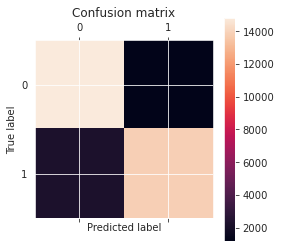

In [45]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

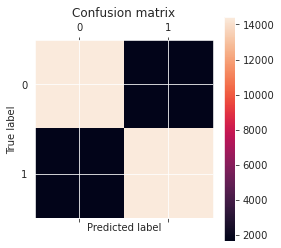

In [41]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16035
           1       0.92      0.86      0.89     16082

    accuracy                           0.89     32117
   macro avg       0.89      0.89      0.89     32117
weighted avg       0.89      0.89      0.89     32117



In [42]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     16035
           1       0.90      0.90      0.90     16082

    accuracy                           0.90     32117
   macro avg       0.90      0.90      0.90     32117
weighted avg       0.90      0.90      0.90     32117



In [75]:
# Use rfpimp library to analyse the importance of each feature
# the rfpimp.importances() function only accept train and test data in the form of dataframe

x = pd.DataFrame(test_d)
y = pd.DataFrame(test_lab)
x_columns = vec.get_feature_names()
x.columns = x_columns 

                           Importance
Feature                              
Adress_Count                 0.077685
time_cl_1                    0.034592
month_cl_2                   0.026092
Street                       0.024753
time_cl_0                    0.021889
time_cl_2                    0.021359
weekday_cl_3                 0.018993
month_cl_1                   0.018215
Residential Premises         0.017810
month_cl_0                   0.017000
year_month_cl_1              0.016471
year_month_cl_0              0.015661
bef_30_365days_count         0.015039
Commercial Premises          0.014323
bef_7_30days_count           0.013451
weekday_cl_0                 0.012890
bef_2_7days_count            0.012019
year_month_cl_2              0.011645
Time                         0.010804
weekday_cl_2                 0.010368
days                         0.009964
Building Site                0.009746
bef_365_begindays_count      0.008002
Weekday                      0.007161
weekday_cl_1

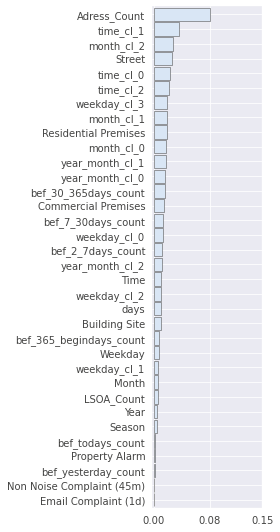

In [76]:
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

                           Importance
Feature                              
Adress_Count                 0.078494
time_cl_1                    0.034561
month_cl_2                   0.025501
Street                       0.024473
time_cl_0                    0.022885
time_cl_2                    0.021982
year_month_cl_0              0.018370
weekday_cl_3                 0.017654
Residential Premises         0.017623
month_cl_1                   0.017094
month_cl_0                   0.016907
year_month_cl_1              0.016346
Commercial Premises          0.014852
bef_30_365days_count         0.014105
bef_7_30days_count           0.013669
weekday_cl_0                 0.012859
year_month_cl_2              0.012112
Time                         0.011147
bef_2_7days_count            0.010742
days                         0.010524
Building Site                0.010462
weekday_cl_2                 0.009870
bef_365_begindays_count      0.007535
Weekday                      0.007286
weekday_cl_1

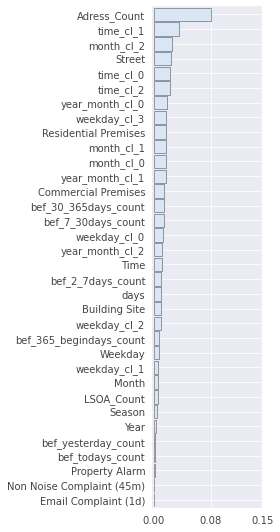

In [48]:
# import model, the test data and lable in the importance funciton
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

                           Importance
Feature                              
Adress_Count                 0.154373
Residential Premises         0.058785
Street                       0.054924
Commercial Premises          0.036803
Building Site                0.023601
bef_7_30days_count           0.021204
time_cl_1                    0.020737
bef_30_365days_count         0.018433
Time                         0.017997
bef_2_7days_count            0.017716
Weekday                      0.013918
month_cl_2                   0.012922
time_cl_2                    0.012330
time_cl_0                    0.011427
days                         0.009279
bef_todays_count             0.008905
year_month_cl_1              0.008874
year_month_cl_0              0.007846
Property Alarm               0.007410
month_cl_0                   0.007348
bef_365_begindays_count      0.006819
month_cl_1                   0.005978
weekday_cl_3                 0.005791
year_month_cl_2              0.004733
bef_yesterda

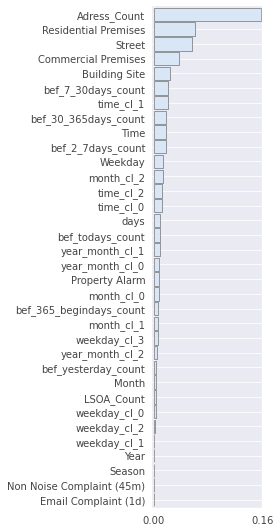

In [44]:
# import model, the test data and lable in the importance funciton
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

# Repeat complaint in 2-7 days

In [37]:
# CV method to Tune the model

In [38]:
#  Defome the shift_dataset
shift_dataset = s_2.copy()

In [39]:
shift_dataset.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [40]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [41]:
independent_and_LSOA_columns = [ 'Unnamed: 0.1',
                                
                                 'Year', 'Month', 'Weekday','Season', 'days','Time', 
                                'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
                                
                                'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
                                
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',
 ]

    
    # Select columns from different dimensions
independent_columns = [ 
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]


independent_columns_order = [ 'Unnamed: 0.1.1',
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]

In [42]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='not majority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(shift_dataset[independent_columns_order], shift_dataset['is_repeat_7days'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [43]:
oversampled

,is_repeat_7days,Unnamed: 0.1.1,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,0,2018,4,6,2,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
1,0,1,2018,4,6,2,0,0,0,0,...,1,843,1,0,0,0,0,0,1,0
2,0,2,2018,4,6,2,0,0,0,0,...,0,661,7,0,0,0,0,0,1,0
3,0,3,2018,4,6,2,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,4,2018,4,6,2,0,2,0,0,...,0,1566,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110441,1,44363,2020,7,0,3,827,15,0,0,...,1,432,4,0,0,0,0,0,0,0
110442,1,35500,2020,2,1,1,695,22,2,0,...,0,3763,1177,0,0,0,0,0,0,1
110443,1,49598,2020,9,4,4,894,20,0,0,...,1,2139,140,0,0,0,0,0,0,1
110444,1,27118,2019,9,5,4,538,7,0,0,...,0,2279,51,0,0,0,0,0,0,0


In [44]:
#oversampled =oversampled.merge(shift_dataset[['Unnamed: 0_x','LSOA11CD']], left_on = 'Unnamed: 0_x', right_on = 'Unnamed: 0_x' )


In [45]:


le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled['is_repeat_7days']) # runs LabelEncoder on the accident_count_levelcolumn

In [46]:
shift_dataset_2_dict = oversampled[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024
index = oversampled.index.values

train_d, test_d, train_lab, test_lab, train_index, test_index = train_test_split(vec_array, label_y, index, random_state=random_state_split)
len(train_d),len(test_d),len(train_lab),len(test_lab),len(train_index),len(test_index)

Number of variables in this transformed data: 34


(82834, 27612, 82834, 27612, 82834, 27612)

In [47]:
train_index

array([ 25557,  22996,  40616, ..., 100844,  74641,  71611])

In [48]:
oversampled_train = oversampled.loc[train_index].sort_values(by = 'Unnamed: 0.1.1' )
oversampled_train

,is_repeat_7days,Unnamed: 0.1.1,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,0,2018,4,6,2,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
3,0,3,2018,4,6,2,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,4,2018,4,6,2,0,2,0,0,...,0,1566,2,0,0,0,0,0,1,0
6,0,6,2018,4,6,2,0,3,0,0,...,0,494,3,0,0,0,0,0,1,0
7,1,7,2018,4,6,2,0,6,0,0,...,0,550,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81501,0,81501,2022,3,3,2,1460,16,0,0,...,1,1049,1,1,0,0,0,0,0,0
81503,1,81503,2022,3,3,2,1460,21,1,2,...,1,2139,511,0,0,0,0,0,0,1
81504,0,81504,2022,3,3,2,1460,21,0,0,...,0,354,2,0,0,0,0,0,1,0
81505,0,81505,2022,3,3,2,1460,22,0,0,...,0,1975,3,0,1,0,0,0,0,0


In [49]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled_train['is_repeat_7days']) # runs LabelEncoder on the accident_count_levelcolumn

shift_dataset_2_dict = oversampled_train[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024


#train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state=random_state_split)
#len(train_d),len(test_d),len(train_lab),len(test_lab)

Number of variables in this transformed data: 34


In [50]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = vec_array
y = label_y


TS_kfold = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

ts_kfold = TS_kfold.split(vec_array, label_y)  

train_indices, test_indices = [list(traintest) for traintest in zip(*ts_kfold)]

ts_cv = [*zip(train_indices,test_indices)]

In [51]:
ts_cv

[(array([    0,     1,     2, ..., 20707, 20708, 20709]),
  array([20710, 20711, 20712, ..., 41415, 41416, 41417])),
 (array([    0,     1,     2, ..., 41415, 41416, 41417]),
  array([41418, 41419, 41420, ..., 62123, 62124, 62125])),
 (array([    0,     1,     2, ..., 62123, 62124, 62125]),
  array([62126, 62127, 62128, ..., 82831, 82832, 82833]))]

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [53]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune

random_state_RF = 200

rf = RandomForestClassifier(random_state = random_state_RF)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = ts_cv, verbose=2, random_state=random_state_RF, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_d, train_lab);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 35s, sys: 3.66 s, total: 1min 38s
Wall time: 7min 2s


RandomizedSearchCV(cv=[(array([    0,     1,     2, ..., 20707, 20708, 20709]),
                        array([20710, 20711, 20712, ..., 41415, 41416, 41417])),
                       (array([    0,     1,     2, ..., 41415, 41416, 41417]),
                        array([41418, 41419, 41420, ..., 62123, 62124, 62125])),
                       (array([    0,     1,     2, ..., 62123, 62124, 62125]),
                        array([62126, 62127, 62128, ..., 82831, 82832, 82833]))],
                   estimator=RandomForestClassifier(random_state=200),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf'

In [56]:
print ("The best parameter value is: ")
print (rf_random.best_params_)
print ("The best score is: ")
print (rf_random.best_score_)

The best parameter value is: 
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
The best score is: 
0.8466132251625781


In [ ]:
%%time
# Use gridsearchCV to explore the best combination of hyperparameter
# Considering the time consuming, range of grid_hyperparameters is very limited

# values of max_depth. 5 values ranging from 10 to 500
list_max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]

# values of n_estimators
list_n_estimators = [50, 100, 150, 200]
# create a grid of the two hyperparameters
#grid_hyperparameters = {'n_estimators':list_n_estimators,'max_depth': list_max_depth}
grid_hyperparameters = {'n_estimators':[50, 100, 150, 200,250,300,350,400,450,500],'max_depth': [10]}

random_state_rf = 200

rf = RandomForestClassifier(random_state_rf)

clf = model_selection.GridSearchCV(rf, grid_hyperparameters,cv=LSOA_cv )

#clf.fit(train_d, train_lab)
clf.fit(X, y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

In [57]:
#{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
random_state_RF = 200
forest_clf = RandomForestClassifier( n_estimators =600, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60, bootstrap=False, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9997585532510804
The accuracy of this classifier on the test data is:0.8609662465594669


In [38]:
random_state_RF = 200
forest_clf = RandomForestClassifier( random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.999975855325108
The accuracy of this classifier on the test data is:0.8591192235260032


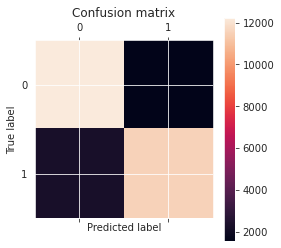

In [58]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

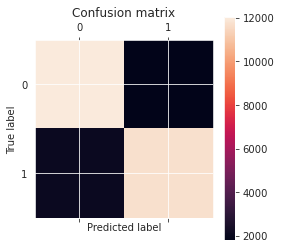

In [39]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     13807
           1       0.88      0.84      0.86     13805

    accuracy                           0.86     27612
   macro avg       0.86      0.86      0.86     27612
weighted avg       0.86      0.86      0.86     27612



In [40]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     13807
           1       0.87      0.85      0.86     13805

    accuracy                           0.86     27612
   macro avg       0.86      0.86      0.86     27612
weighted avg       0.86      0.86      0.86     27612



In [60]:
# Use rfpimp library to analyse the importance of each feature
# the rfpimp.importances() function only accept train and test data in the form of dataframe

x = pd.DataFrame(test_d)
y = pd.DataFrame(test_lab)
x_columns = vec.get_feature_names()
x.columns = x_columns 

                           Importance
Feature                              
Adress_Count                 0.167319
time_cl_1                    0.023649
month_cl_2                   0.018724
time_cl_0                    0.015863
time_cl_2                    0.015682
month_cl_1                   0.013509
Street                       0.013146
month_cl_0                   0.012386
bef_2_7days_count            0.011336
year_month_cl_0              0.011155
weekday_cl_3                 0.011082
Residential Premises         0.010648
bef_30_365days_count         0.010611
bef_365_begindays_count      0.009959
year_month_cl_2              0.009706
year_month_cl_1              0.009090
Commercial Premises          0.008366
bef_7_30days_count           0.006700
Time                         0.006483
weekday_cl_0                 0.006410
Building Site                0.006265
bef_todays_count             0.006229
days                         0.003803
Weekday                      0.003694
bef_yesterda

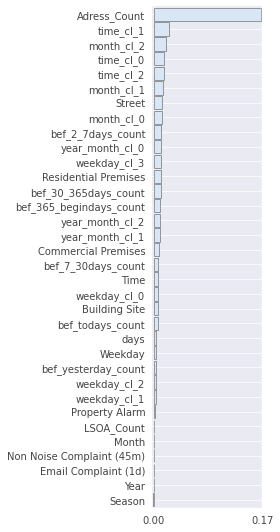

In [61]:
# import model, the test data and lable in the importance funciton
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

                           Importance
Feature                              
Adress_Count                 0.169781
Street                       0.033138
Residential Premises         0.032413
Commercial Premises          0.020643
bef_30_365days_count         0.020100
bef_2_7days_count            0.018615
bef_7_30days_count           0.018398
Building Site                0.015211
bef_365_begindays_count      0.013762
time_cl_1                    0.011698
Time                         0.009959
Weekday                      0.009235
bef_todays_count             0.007931
days                         0.007859
time_cl_2                    0.007497
time_cl_0                    0.006410
month_cl_2                   0.005976
year_month_cl_1              0.005722
month_cl_0                   0.005469
bef_yesterday_count          0.005396
Property Alarm               0.005324
LSOA_Count                   0.004744
year_month_cl_0              0.004744
month_cl_1                   0.003622
year_month_c

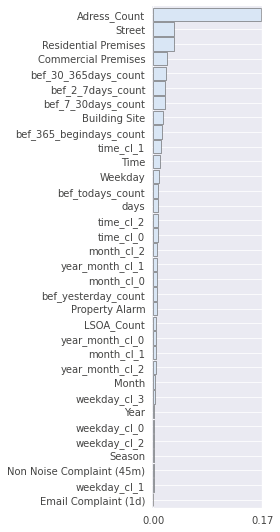

In [42]:
# import model, the test data and lable in the importance funciton
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

# Repeat complaint in next 30 days(today to tomorrow) 

In [23]:
# CV method to Tune the model

In [24]:
#  Defome the shift_dataset
shift_dataset = s_2.copy()

In [25]:
shift_dataset.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [26]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [27]:
independent_and_LSOA_columns = [ 'Unnamed: 0.1',
                                
                                 'Year', 'Month', 'Weekday','Season', 'days','Time', 
                                'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
                                
                                'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
                                
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',
 ]

    
    # Select columns from different dimensions
independent_columns = [ 
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]


independent_columns_order = [ 'Unnamed: 0.1.1',
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]

In [28]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='not majority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(shift_dataset[independent_columns_order], shift_dataset['is_repeat_7_30days'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [29]:
oversampled

,is_repeat_7_30days,Unnamed: 0.1.1,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,0,2018,4,6,2,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
1,0,1,2018,4,6,2,0,0,0,0,...,1,843,1,0,0,0,0,0,1,0
2,0,2,2018,4,6,2,0,0,0,0,...,0,661,7,0,0,0,0,0,1,0
3,1,3,2018,4,6,2,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,4,2018,4,6,2,0,2,0,0,...,0,1566,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141997,1,57357,2021,1,1,1,1036,16,0,0,...,0,760,41,0,0,0,0,0,0,0
141998,1,16214,2019,3,0,2,344,11,0,0,...,0,2279,16,0,0,0,0,0,0,0
141999,1,341,2018,4,1,2,9,3,0,0,...,1,720,28,0,0,0,0,0,0,0
142000,1,38704,2020,4,1,2,751,11,0,0,...,1,834,5,0,0,0,0,0,1,0


In [30]:
#oversampled =oversampled.merge(shift_dataset[['Unnamed: 0_x','LSOA11CD']], left_on = 'Unnamed: 0_x', right_on = 'Unnamed: 0_x' )


In [31]:


le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled['is_repeat_7_30days']) # runs LabelEncoder on the accident_count_levelcolumn

In [32]:
shift_dataset_2_dict = oversampled[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024
index = oversampled.index.values

train_d, test_d, train_lab, test_lab, train_index, test_index = train_test_split(vec_array, label_y, index, random_state=random_state_split)
len(train_d),len(test_d),len(train_lab),len(test_lab),len(train_index),len(test_index)

Number of variables in this transformed data: 34


(106501, 35501, 106501, 35501, 106501, 35501)

In [33]:
train_index

array([ 82508,  86650,  68024, ...,  19045, 100844, 113249])

In [34]:
oversampled_train = oversampled.loc[train_index].sort_values(by = 'Unnamed: 0.1.1' )
oversampled_train

,is_repeat_7_30days,Unnamed: 0.1.1,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,0,2018,4,6,2,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
3,1,3,2018,4,6,2,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,4,2018,4,6,2,0,2,0,0,...,0,1566,2,0,0,0,0,0,1,0
140292,1,4,2018,4,6,2,0,1,0,0,...,0,511,4,0,0,0,0,0,1,0
5,0,5,2018,4,6,2,0,2,0,0,...,0,475,4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81501,0,81501,2022,3,3,2,1460,16,0,0,...,1,1049,1,1,0,0,0,0,0,0
81503,0,81503,2022,3,3,2,1460,21,1,2,...,1,2139,511,0,0,0,0,0,0,1
81504,0,81504,2022,3,3,2,1460,21,0,0,...,0,354,2,0,0,0,0,0,1,0
81505,0,81505,2022,3,3,2,1460,22,0,0,...,0,1975,3,0,1,0,0,0,0,0


In [35]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled_train['is_repeat_7_30days']) # runs LabelEncoder on the accident_count_levelcolumn

shift_dataset_2_dict = oversampled_train[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024


#train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state=random_state_split)
#len(train_d),len(test_d),len(train_lab),len(test_lab)

Number of variables in this transformed data: 34


In [36]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = vec_array
y = label_y


TS_kfold = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

ts_kfold = TS_kfold.split(vec_array, label_y)  

train_indices, test_indices = [list(traintest) for traintest in zip(*ts_kfold)]

ts_cv = [*zip(train_indices,test_indices)]

In [37]:
ts_cv

[(array([    0,     1,     2, ..., 26623, 26624, 26625]),
  array([26626, 26627, 26628, ..., 53248, 53249, 53250])),
 (array([    0,     1,     2, ..., 53248, 53249, 53250]),
  array([53251, 53252, 53253, ..., 79873, 79874, 79875])),
 (array([    0,     1,     2, ..., 79873, 79874, 79875]),
  array([ 79876,  79877,  79878, ..., 106498, 106499, 106500]))]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [44]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune

random_state_RF = 200

rf = RandomForestClassifier(random_state = random_state_RF)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = ts_cv, verbose=2, random_state=random_state_RF, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_d, train_lab);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 23s, sys: 2.02 s, total: 1min 25s
Wall time: 7min 33s


RandomizedSearchCV(cv=[(array([    0,     1,     2, ..., 26623, 26624, 26625]),
                        array([26626, 26627, 26628, ..., 53248, 53249, 53250])),
                       (array([    0,     1,     2, ..., 53248, 53249, 53250]),
                        array([53251, 53252, 53253, ..., 79873, 79874, 79875])),
                       (array([    0,     1,     2, ..., 79873, 79874, 79875]),
                        array([ 79876,  79877,  79878, ..., 106498, 106499, 106500]))],
                   estimator=RandomForestClassifier(random_state=200),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples

In [45]:
print ("The best parameter value is: ")
print (rf_random.best_params_)
print ("The best score is: ")
print (rf_random.best_score_)

The best parameter value is: 
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
The best score is: 
0.9091580594679186
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  58.3s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  57.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  52.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=2

In [ ]:
%%time
# Use gridsearchCV to explore the best combination of hyperparameter
# Considering the time consuming, range of grid_hyperparameters is very limited

# values of max_depth. 5 values ranging from 10 to 500
list_max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]

# values of n_estimators
list_n_estimators = [50, 100, 150, 200]
# create a grid of the two hyperparameters
#grid_hyperparameters = {'n_estimators':list_n_estimators,'max_depth': list_max_depth}
grid_hyperparameters = {'n_estimators':[50, 100, 150, 200,250,300,350,400,450,500],'max_depth': [10]}

random_state_rf = 200

rf = RandomForestClassifier(random_state_rf)

clf = model_selection.GridSearchCV(rf, grid_hyperparameters,cv=LSOA_cv )

#clf.fit(train_d, train_lab)
clf.fit(X, y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

In [38]:
#{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}
#{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
random_state_RF = 200
forest_clf = RandomForestClassifier( n_estimators =1000, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=100, bootstrap=True, random_state = random_state_RF)

forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.948254007004629
The accuracy of this classifier on the test data is:0.9086222923297935


In [46]:
#{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier( n_estimators =600, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=110, bootstrap=True, random_state = random_state_RF)

forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 1.7min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 1.0min
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  55.6s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 4.6min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 4.7min
[CV] END bootstrap=False, max_depth=90, max

In [64]:
random_state_RF = 200
forest_clf = RandomForestClassifier( random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9999624416672144
The accuracy of this classifier on the test data is:0.9115799554942114


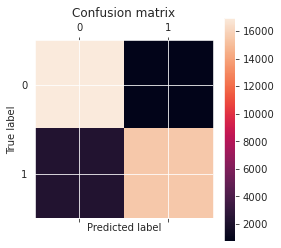

In [47]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

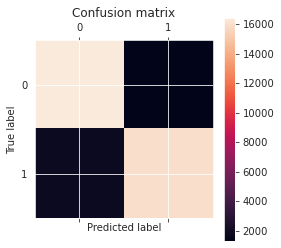

In [65]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17756
           1       0.95      0.87      0.91     17745

    accuracy                           0.91     35501
   macro avg       0.92      0.91      0.91     35501
weighted avg       0.92      0.91      0.91     35501



In [66]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     17756
           1       0.92      0.90      0.91     17745

    accuracy                           0.91     35501
   macro avg       0.91      0.91      0.91     35501
weighted avg       0.91      0.91      0.91     35501



In [49]:
# Use rfpimp library to analyse the importance of each feature
# the rfpimp.importances() function only accept train and test data in the form of dataframe

x = pd.DataFrame(test_d)
y = pd.DataFrame(test_lab)
x_columns = vec.get_feature_names()
x.columns = x_columns 

                           Importance
Feature                              
Adress_Count                 0.042928
weekday_cl_3                 0.038309
month_cl_1                   0.035576
month_cl_2                   0.034196
Residential Premises         0.031858
time_cl_1                    0.031182
month_cl_0                   0.030422
weekday_cl_0                 0.027464
time_cl_0                    0.024844
time_cl_2                    0.022563
year_month_cl_0              0.022535
Street                       0.019802
year_month_cl_1              0.019746
weekday_cl_2                 0.017718
year_month_cl_2              0.016366
weekday_cl_1                 0.014535
Commercial Premises          0.011802
Building Site                0.008253
bef_30_365days_count         0.006648
LSOA_Count                   0.005042
Weekday                      0.004901
days                         0.004507
Time                         0.004028
Property Alarm               0.003915
bef_7_30days

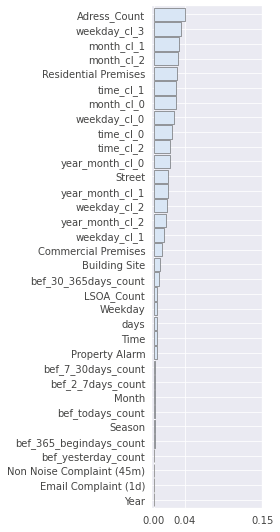

In [50]:
# import model, the test data and lable in the importance funciton
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

                           Importance
Feature                              
Adress_Count                 0.110617
Residential Premises         0.090814
Street                       0.045802
bef_30_365days_count         0.034985
Commercial Premises          0.031830
Building Site                0.026056
Weekday                      0.018535
Property Alarm               0.016338
Time                         0.015831
bef_7_30days_count           0.015126
days                         0.014084
LSOA_Count                   0.012450
time_cl_1                    0.011408
bef_yesterday_count          0.011211
bef_2_7days_count            0.009859
month_cl_0                   0.009605
bef_todays_count             0.009296
weekday_cl_3                 0.009183
month_cl_1                   0.009155
month_cl_2                   0.008929
bef_365_begindays_count      0.008619
year_month_cl_0              0.008197
year_month_cl_2              0.008197
Month                        0.007943
year_month_c

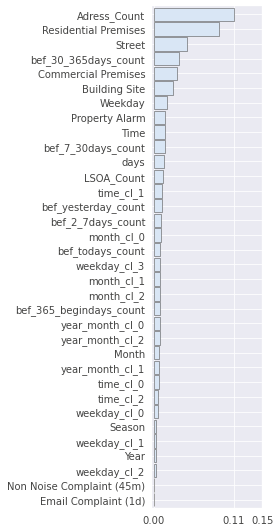

In [68]:
# import model, the test data and lable in the importance funciton
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

# Visualisation of the result

In [37]:
RF_result_collection = pd.read_csv('RF_model_accuracy_update.csv').dropna()

In [38]:
RF_result_collection

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
0,2days,normal,A,0,0.800561,0.778343
1,2days,normal,A,1,0.800561,0.778343
2,2days,normal,A+B,0,0.999687,0.869747
3,2days,normal,A+B,1,0.999687,0.869747
4,2days,normal,A+C,0,0.955896,0.845542
5,2days,normal,A+C,1,0.955896,0.845542
6,2days,normal,A+D,0,0.802921,0.778948
7,2days,normal,A+D,1,0.802921,0.778948
8,2days,normal,A+B+C,0,0.999960,0.881547
9,2days,normal,A+B+C,1,0.999960,0.881547


In [39]:
RF_result_collection_2days_normal = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '2days') & (RF_result_collection.combination.isin (['A+B','A+C','A+D'])) ].drop_duplicates(subset = ['combination'])
RF_result_collection_2days_normal

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
2,2days,normal,A+B,0,0.999687,0.869747
4,2days,normal,A+C,0,0.955896,0.845542
6,2days,normal,A+D,0,0.802921,0.778948


In [40]:
RF_result_collection_2_7days_normal = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '2-7days') & (RF_result_collection.combination.isin (['A+B','A+C','A+D'])) ].drop_duplicates(subset = ['combination'])
RF_result_collection_2_7days_normal

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
16,2-7days,normal,A+B,0,0.999801,0.831107
18,2-7days,normal,A+C,0,0.954293,0.820351
20,2-7days,normal,A+D,0,0.807541,0.774657


In [41]:
RF_result_collection_7_30days_normal = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '7-30days') & (RF_result_collection.combination.isin (['A+B','A+C','A+D'])) ].drop_duplicates(subset = ['combination'])
RF_result_collection_7_30days_normal

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
30,7-30days,normal,A+B,0,0.999717,0.898232
32,7-30days,normal,A+C,0,0.955657,0.853643
34,7-30days,normal,A+D,0,0.788458,0.770460


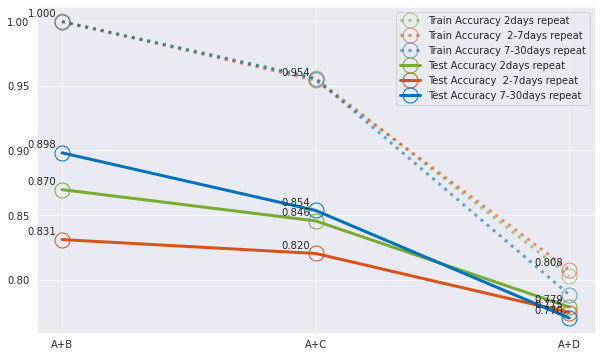

In [42]:
data_1 = RF_result_collection_2days_normal
data_2 = RF_result_collection_2_7days_normal
data_3 = RF_result_collection_7_30days_normal


x_ticks = range(0,3,1)
x_labels = ['A+B','A+C','A+D']
fig, ax = plt.subplots(1,1,figsize=(10,6))

#ax.plot(
    #data_1.combination, data_1.Test_Accuracy, ls="--", lw=3, 
    #marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black",
    #label="2days_repeat"
#)



# Train Accuracy

ax.plot(
    data_1.combination, data_1.Train_Accuracy, ls=":", lw=3, 
    marker="o", markersize=15, markerfacecolor="none", color = '#77AC30', alpha = 0.6,
    label="Train Accuracy 2days repeat"
)

ax.plot(
    data_2.combination, data_2.Train_Accuracy, ls=":", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color ='#D95319', alpha = 0.6,
    label="Train Accuracy  2-7days repeat"
)
ax.plot(
    data_3.combination, data_3.Train_Accuracy, ls=":", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color = '#0072BD', alpha = 0.6,
    label="Train Accuracy 7-30days repeat"
)

# test accuracy
ax.plot(
    data_1.combination, data_1.Test_Accuracy, ls="-", lw=3, 
    marker="o", markersize=15, markerfacecolor="none", color = '#77AC30',
    label="Test Accuracy 2days repeat"
)

ax.plot(
    data_2.combination, data_2.Test_Accuracy, ls="-", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color ='#D95319', 
    label="Test Accuracy  2-7days repeat"
)
ax.plot(
    data_3.combination, data_3.Test_Accuracy, ls="-", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color = '#0072BD',
    label="Test Accuracy 7-30days repeat"
)




for x,y in zip(data_1.combination,data_1.Test_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(data_2.combination,data_2.Test_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   
    
for x,y in zip(data_3.combination,data_3.Test_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   

    
    
for x,y in zip(data_2.combination,data_2.Train_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   


ax.set_xticks(x_ticks)

ax.set_xticklabels(x_labels, rotation='horizontal', fontsize=10)

#plt.grid(False)
plt.legend()
plt.show()

In [43]:
RF_result_collection_2days_normal = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '2days') & (RF_result_collection.combination.isin (['A+B+C','A+B+D'])) ].drop_duplicates(subset = ['combination'])
RF_result_collection_2days_normal

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
8,2days,normal,A+B+C,0,0.999960,0.881547
10,2days,normal,A+B+D,0,0.999697,0.887901


In [44]:
RF_result_collection_2_7days_normal = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '2-7days') & (RF_result_collection.combination.isin (['A+B+C','A+B+D'])) ].drop_duplicates(subset = ['combination'])
RF_result_collection_2_7days_normal

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
22,2-7days,normal,A+B+C,0,0.999965,0.847135
24,2-7days,normal,A+B+D,0,0.999813,0.846151


In [45]:
RF_result_collection_7_30days_normal = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '7-30days') & (RF_result_collection.combination.isin (['A+B+C','A+B+D'])) ].drop_duplicates(subset = ['combination'])
RF_result_collection_7_30days_normal

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
36,7-30days,normal,A+B+C,0,0.999936,0.897520
38,7-30days,normal,A+B+D,0,0.999763,0.914819


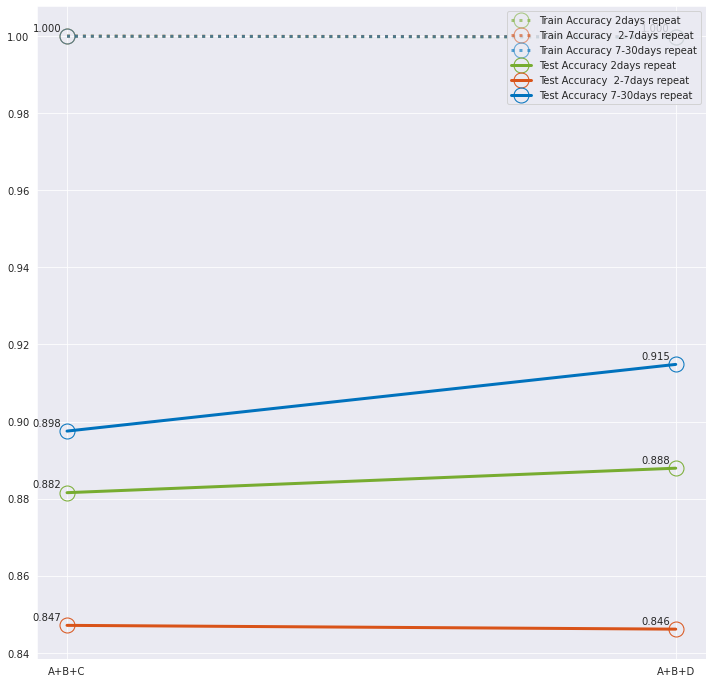

In [46]:
data_1 = RF_result_collection_2days_normal
data_2 = RF_result_collection_2_7days_normal
data_3 = RF_result_collection_7_30days_normal


x_ticks = range(0,2,1)
x_labels = ['A+B+C','A+B+D']
fig, ax = plt.subplots(1,1,figsize=(12,12))

#ax.plot(
    #data_1.combination, data_1.Test_Accuracy, ls="--", lw=3, 
    #marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black",
    #label="2days_repeat"
#)



# Train Accuracy

ax.plot(
    data_1.combination, data_1.Train_Accuracy, ls=":", lw=3, 
    marker="o", markersize=15, markerfacecolor="none", color = '#77AC30', alpha = 0.6,
    label="Train Accuracy 2days repeat"
)

ax.plot(
    data_2.combination, data_2.Train_Accuracy, ls=":", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color ='#D95319', alpha = 0.6,
    label="Train Accuracy  2-7days repeat"
)
ax.plot(
    data_3.combination, data_3.Train_Accuracy, ls=":", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color = '#0072BD', alpha = 0.6,
    label="Train Accuracy 7-30days repeat"
)

# test accuracy
ax.plot(
    data_1.combination, data_1.Test_Accuracy, ls="-", lw=3, 
    marker="o", markersize=15, markerfacecolor="none", color = '#77AC30',
    label="Test Accuracy 2days repeat"
)

ax.plot(
    data_2.combination, data_2.Test_Accuracy, ls="-", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color ='#D95319', 
    label="Test Accuracy  2-7days repeat"
)
ax.plot(
    data_3.combination, data_3.Test_Accuracy, ls="-", lw=3,
    marker="o", markersize=15, markerfacecolor="None", color = '#0072BD',
    label="Test Accuracy 7-30days repeat"
)




for x,y in zip(data_1.combination,data_1.Test_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(data_2.combination,data_2.Test_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   
    
for x,y in zip(data_3.combination,data_3.Test_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   

    
    
for x,y in zip(data_2.combination,data_2.Train_Accuracy):

    label = "{:.3f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   


ax.set_xticks(x_ticks)

ax.set_xticklabels(x_labels, rotation='horizontal', fontsize=10)

#plt.grid(False)
plt.legend(loc = 'upper right')
plt.show()

In [47]:
# 接下来想画一个分别显示 非重复-重复 非重复-重复 非重复-重复的招呼率的图

In [48]:
RF_result_collection_2days_normal_1 = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '2days') & (RF_result_collection.combination.isin (['A','A+B','A+C+D','A+B+C+D'])) ]
RF_result_collection_2days_normal_1

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
0,2days,normal,A,0,0.800561,0.778343
1,2days,normal,A,1,0.800561,0.778343
2,2days,normal,A+B,0,0.999687,0.869747
3,2days,normal,A+B,1,0.999687,0.869747
12,2days,normal,A+B+C+D,0,0.999960,0.894436
13,2days,normal,A+B+C+D,1,0.999960,0.894436


In [49]:
RF_result_collection_2days_normal_2 = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '2-7days') & (RF_result_collection.combination.isin (['A','A+B','A+C+D','A+B+C+D']))  ]
RF_result_collection_2days_normal_2

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
14,2-7days,normal,A,0,0.806029,0.773357
15,2-7days,normal,A,1,0.806029,0.773357
16,2-7days,normal,A+B,0,0.999801,0.831107
17,2-7days,normal,A+B,1,0.999801,0.831107
26,2-7days,normal,A+B+C+D,0,0.999965,0.855325
27,2-7days,normal,A+B+C+D,1,0.999965,0.855325


In [50]:
RF_result_collection_2days_normal_3 = RF_result_collection.loc[(RF_result_collection.Predict_cycle == '7-30days') & (RF_result_collection.combination.isin (['A','A+B','A+C+D','A+B+C+D'])) ]
RF_result_collection_2days_normal_3

,Predict_cycle,CV_Type,combination,Predicted Variable,Train_Accuracy,Test_Accuracy
28,7-30days,normal,A,0,0.785091,0.766683
29,7-30days,normal,A,1,0.785091,0.766683
30,7-30days,normal,A+B,0,0.999717,0.898232
31,7-30days,normal,A+B,1,0.999717,0.898232
40,7-30days,normal,A+B+C+D,0,0.999964,0.916160
41,7-30days,normal,A+B+C+D,1,0.999964,0.916160


In [51]:
RF_result_collection_normal = RF_result_collection.loc[ (RF_result_collection.combination.isin (['A','A+B','A+C+D','A+B+C+D'])) ]
RF_result_collection_normal

RF_result_collection_normal.rename(columns ={'Predicted Variable':'Recall_Score_Type'},inplace = True)
RF_result_collection_normal.loc[RF_result_collection_normal['Recall_Score_Type'] == 0, 'Recall_Score_Type'] ='Not Repeat' 
RF_result_collection_normal.loc[RF_result_collection_normal['Recall_Score_Type'] == 1, 'Recall_Score_Type'] ='Repeat' 

In [52]:
RF_result_collection_normal

,Predict_cycle,CV_Type,combination,Recall_Score_Type,Train_Accuracy,Test_Accuracy
0,2days,normal,A,Not Repeat,0.800561,0.778343
1,2days,normal,A,Repeat,0.800561,0.778343
2,2days,normal,A+B,Not Repeat,0.999687,0.869747
3,2days,normal,A+B,Repeat,0.999687,0.869747
12,2days,normal,A+B+C+D,Not Repeat,0.999960,0.894436
13,2days,normal,A+B+C+D,Repeat,0.999960,0.894436
14,2-7days,normal,A,Not Repeat,0.806029,0.773357
15,2-7days,normal,A,Repeat,0.806029,0.773357
16,2-7days,normal,A+B,Not Repeat,0.999801,0.831107
17,2-7days,normal,A+B,Repeat,0.999801,0.831107


In [53]:
colors = ["#69b3a2", "#4374B3"]
pal = sns.color_palette(colors)
g = sns.catplot(x="combination", y="Recall",hue="Recall_Score_Type", col="Predict_cycle",data=RF_result_collection_normal, kind="bar",height=6, aspect=1, alpha=0.5,palette=pal);


ax = plt.gca()

for ax in g.axes.ravel():
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=10, color='black', ha='center', va='bottom')

ValueError: Could not interpret input 'Recall'

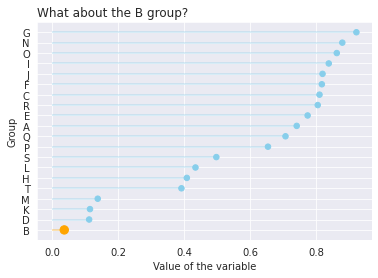

In [54]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it based on values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# Create a color if the group is "B"
my_color=np.where(ordered_df ['group']=='B', 'orange', 'skyblue')
my_size=np.where(ordered_df ['group']=='B', 70, 30)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['values'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

In [49]:
importance_collection = pd.read_csv('RF_model_importance_timeseries.csv')

In [50]:
importance_collection

,Feature,Importance,Type
0,Adress_Count,0.042928,7-30 days
1,weekday_cl_3,0.038309,7-30 days
2,month_cl_1,0.035576,7-30 days
3,month_cl_2,0.034196,7-30 days
4,Residential Premises,0.031858,7-30 days
...,...,...,...
97,bef_todays_count,0.002429,0-2 days
98,Property Alarm,0.001993,0-2 days
99,bef_yesterday_count,0.001930,0-2 days
100,Non Noise Complaint (45m),0.000000,0-2 days


In [51]:
A = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C = ['bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', ]

D = ['year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 'month_cl_0', 'month_cl_1', 'month_cl_2',
      
       'time_cl_0', 'time_cl_1', 'time_cl_2', 'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 'weekday_cl_4', 'weekday_cl_5']
      
    
    

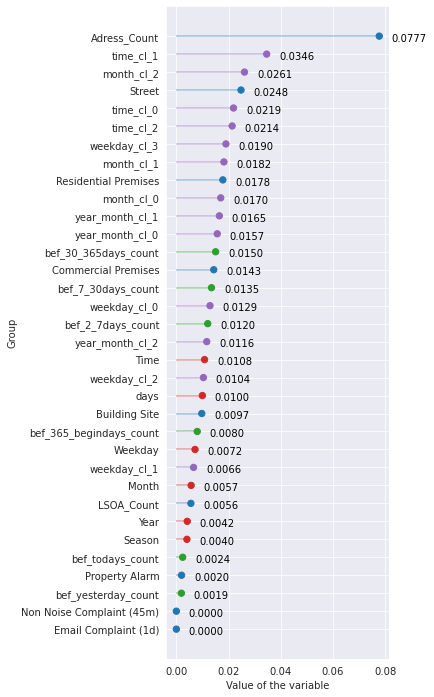

In [58]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

In [53]:
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
df

,index,Feature,Importance,Type
0,68,Adress_Count,0.077685,0-2 days
1,69,time_cl_1,0.034592,0-2 days
2,70,month_cl_2,0.026092,0-2 days
3,71,Street,0.024753,0-2 days
4,72,time_cl_0,0.021889,0-2 days
5,73,time_cl_2,0.021359,0-2 days
6,74,weekday_cl_3,0.018993,0-2 days
7,75,month_cl_1,0.018215,0-2 days
8,76,Residential Premises,0.017810,0-2 days
9,77,month_cl_0,0.017000,0-2 days


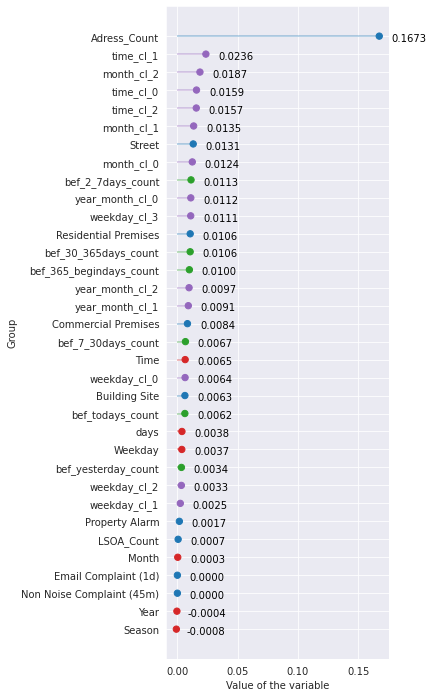

In [57]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='2-7 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

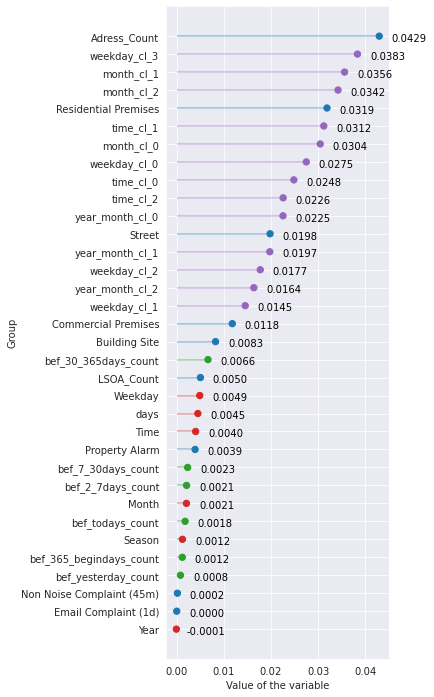

In [55]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='7-30 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')
#plt.legend(['A','B','C','D'])
# show the graph
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_state_RF = 200
rf = RandomForestClassifier(random_state = random_state_RF)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 200,
 'verbose': 0,
 'warm_start': False}


# Repeat complaint in next 2 days(today to tomorrow) 

In [74]:
# CV method to Tune the model

In [75]:
#  Defome the shift_dataset
shift_dataset = s_2.copy()

In [76]:
shift_dataset.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [77]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [78]:
independent_and_LSOA_columns = [ 'Unnamed: 0.1',
                                
                                 'Year', 'Month', 'Weekday','Season', 'days','Time', 
                                'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
                                
                                'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
                                
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',
 ]

    
    # Select columns from different dimensions
independent_columns = [ 
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]


independent_columns_order = [ 'Unnamed: 0.1.1',
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]

In [79]:



# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='not majority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(shift_dataset[independent_columns], shift_dataset['is_repeat_2days'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

# 由于这里多了一个order,但是resampled数据顺序产生变化

In [80]:
oversampled

,is_repeat_2days,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,bef_2_7days_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,2018,4,6,2,0,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
1,0,2018,4,6,2,0,0,0,0,0,...,1,843,1,0,0,0,0,0,1,0
2,0,2018,4,6,2,0,0,0,0,0,...,0,661,7,0,0,0,0,0,1,0
3,0,2018,4,6,2,0,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,2018,4,6,2,0,2,0,0,0,...,0,1566,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128461,1,2021,5,3,2,1145,22,1,0,0,...,1,538,66,0,0,0,0,0,1,0
128462,1,2021,4,5,2,1132,16,0,0,1,...,1,434,112,0,0,0,0,0,1,0
128463,1,2021,1,2,1,1014,6,0,0,0,...,0,430,40,0,0,0,0,0,1,0
128464,1,2022,2,5,1,1427,17,0,0,0,...,0,454,5,0,0,0,0,0,0,0


In [33]:
#oversampled =oversampled.merge(shift_dataset[['Unnamed: 0_x','LSOA11CD']], left_on = 'Unnamed: 0_x', right_on = 'Unnamed: 0_x' )


In [34]:


le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled['is_repeat_2days']) # runs LabelEncoder on the accident_count_levelcolumn

In [35]:
shift_dataset_2_dict = oversampled[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024
index = oversampled.index.values

train_d, test_d, train_lab, test_lab, train_index, test_index = train_test_split(vec_array, label_y, index, random_state=random_state_split)
len(train_d),len(test_d),len(train_lab),len(test_lab),len(train_index),len(test_index)

Number of variables in this transformed data: 34


(96349, 32117, 96349, 32117, 96349, 32117)

In [36]:
train_index

array([ 50863,  53384,  55399, ..., 113249,  74641,  71611])

In [37]:
train_d

array([[1.000e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.900e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.177e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [6.100e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [38]:
oversampled_train = oversampled.loc[train_index].sort_values(by = ['days','Time'] )
oversampled_train

,is_repeat_2days,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,bef_2_7days_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,2018,4,6,2,0,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
3,0,2018,4,6,2,0,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
105655,1,2018,4,1,2,0,2,0,1,0,...,1,442,11,0,0,0,0,0,1,0
4,0,2018,4,6,2,0,2,0,0,0,...,0,1566,2,0,0,0,0,0,1,0
6,0,2018,4,6,2,0,3,0,0,0,...,0,494,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83519,1,2022,3,3,2,1460,20,0,2,8,...,1,2139,511,0,0,0,0,0,0,1
81504,0,2022,3,3,2,1460,21,0,0,0,...,0,354,2,0,0,0,0,0,1,0
81503,1,2022,3,3,2,1460,21,1,2,8,...,1,2139,511,0,0,0,0,0,0,1
81505,0,2022,3,3,2,1460,22,0,0,0,...,0,1975,3,0,1,0,0,0,0,0


In [39]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled_train['is_repeat_2days']) # runs LabelEncoder on the accident_count_levelcolumn

shift_dataset_2_dict = oversampled_train[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024


#train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state=random_state_split)
#len(train_d),len(test_d),len(train_lab),len(test_lab)

Number of variables in this transformed data: 34


In [40]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = vec_array
y = label_y


TS_kfold = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

ts_kfold = TS_kfold.split(vec_array, label_y)  

train_indices, test_indices = [list(traintest) for traintest in zip(*ts_kfold)]

ts_cv = [*zip(train_indices,test_indices)]

In [41]:
ts_cv

[(array([    0,     1,     2, ..., 24085, 24086, 24087]),
  array([24088, 24089, 24090, ..., 48172, 48173, 48174])),
 (array([    0,     1,     2, ..., 48172, 48173, 48174]),
  array([48175, 48176, 48177, ..., 72259, 72260, 72261])),
 (array([    0,     1,     2, ..., 72259, 72260, 72261]),
  array([72262, 72263, 72264, ..., 96346, 96347, 96348]))]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [62]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune

random_state_RF = 200

rf = RandomForestClassifier(random_state = random_state_RF)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = ts_cv, verbose=2, random_state=random_state_RF, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 50s, sys: 3.95 s, total: 1min 54s
Wall time: 7min 51s


RandomizedSearchCV(cv=[(array([    0,     1,     2, ..., 24085, 24086, 24087]),
                        array([24088, 24089, 24090, ..., 48172, 48173, 48174])),
                       (array([    0,     1,     2, ..., 48172, 48173, 48174]),
                        array([48175, 48176, 48177, ..., 72259, 72260, 72261])),
                       (array([    0,     1,     2, ..., 72259, 72260, 72261]),
                        array([72262, 72263, 72264, ..., 96346, 96347, 96348]))],
                   estimator=RandomForestClassifier(random_state=200),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf'

In [63]:
print ("The best parameter value is: ")
print (rf_random.best_params_)
print ("The best score is: ")
print (rf_random.best_score_)

The best parameter value is: 
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
The best score is: 
0.7935677613096969
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  52.5s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.1min
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  59.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  10.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  29.4s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;

In [42]:
# 最佳参数{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier(n_estimators =1000, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=100, bootstrap=True, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9323293443626816
The accuracy of this classifier on the test data is:0.8837998567736712


In [44]:
# 最佳参数{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier(n_estimators =1000, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=100, bootstrap=True, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9327133649544884
The accuracy of this classifier on the test data is:0.8923311641809634


In [40]:
random_state_RF = 200
forest_clf = RandomForestClassifier( random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

The accuracy of this classifier on the train data is:0.9999481053254315
The accuracy of this classifier on the test data is:0.89581841392409


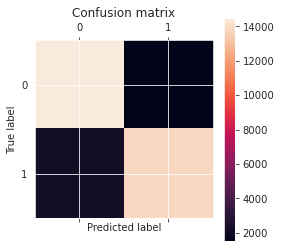

In [43]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

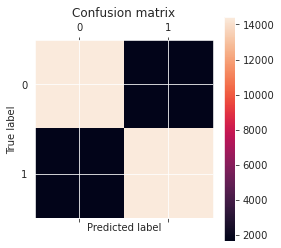

In [41]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     16035
           1       0.90      0.86      0.88     16082

    accuracy                           0.88     32117
   macro avg       0.88      0.88      0.88     32117
weighted avg       0.88      0.88      0.88     32117



In [42]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     16035
           1       0.90      0.90      0.90     16082

    accuracy                           0.90     32117
   macro avg       0.90      0.90      0.90     32117
weighted avg       0.90      0.90      0.90     32117



In [45]:
# Use rfpimp library to analyse the importance of each feature
# the rfpimp.importances() function only accept train and test data in the form of dataframe

x = pd.DataFrame(test_d)
y = pd.DataFrame(test_lab)
x_columns = vec.get_feature_names()
x.columns = x_columns 

                           Importance
Feature                              
Adress_Count                 0.107264
Residential Premises         0.060871
Street                       0.054924
Commercial Premises          0.036990
Building Site                0.024535
time_cl_1                    0.021422
bef_30_365days_count         0.020083
Time                         0.016720
bef_7_30days_count           0.016346
Weekday                      0.015350
month_cl_2                   0.014727
days                         0.014603
time_cl_2                    0.014198
bef_2_7days_count            0.013233
time_cl_0                    0.012922
bef_365_begindays_count      0.012797
year_month_cl_1              0.012143
year_month_cl_0              0.011520
LSOA_Count                   0.009590
year_month_cl_2              0.009061
weekday_cl_3                 0.008998
month_cl_1                   0.007971
month_cl_0                   0.007628
Month                        0.007224
Property Ala

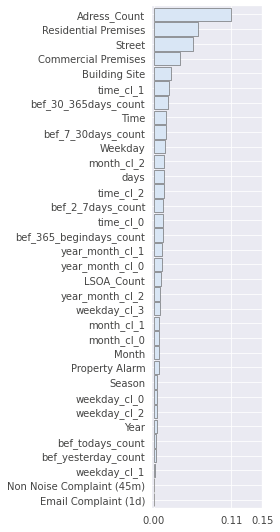

In [46]:
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

# Repeat complaint in next 7 days

In [47]:
# CV method to Tune the model

In [48]:
#  Defome the shift_dataset
shift_dataset = s_2.copy()

In [49]:
shift_dataset.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [50]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [51]:
independent_and_LSOA_columns = [ 'Unnamed: 0.1',
                                
                                 'Year', 'Month', 'Weekday','Season', 'days','Time', 
                                'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
                                
                                'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
                                
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',
 ]

    
    # Select columns from different dimensions
independent_columns = [ 
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]


independent_columns_order = [ 'Unnamed: 0.1.1',
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]

In [52]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='not majority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(shift_dataset[independent_columns], shift_dataset['is_repeat_7days'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

# 由于这里多了一个order,但是resampled数据顺序产生变化

In [53]:
oversampled

,is_repeat_7days,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,bef_2_7days_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,2018,4,6,2,0,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
1,0,2018,4,6,2,0,0,0,0,0,...,1,843,1,0,0,0,0,0,1,0
2,0,2018,4,6,2,0,0,0,0,0,...,0,661,7,0,0,0,0,0,1,0
3,0,2018,4,6,2,0,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,2018,4,6,2,0,2,0,0,0,...,0,1566,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110441,1,2020,7,3,3,825,22,0,0,0,...,0,429,2,0,0,0,0,0,0,0
110442,1,2020,2,1,1,695,22,2,0,5,...,0,3763,1177,0,0,0,0,0,0,1
110443,1,2020,9,4,4,894,19,0,0,3,...,1,2139,140,0,0,0,0,0,0,1
110444,1,2019,9,3,4,536,13,0,0,0,...,0,2279,16,0,0,0,0,1,0,0


In [54]:
#oversampled =oversampled.merge(shift_dataset[['Unnamed: 0_x','LSOA11CD']], left_on = 'Unnamed: 0_x', right_on = 'Unnamed: 0_x' )


In [55]:


le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled['is_repeat_7days']) # runs LabelEncoder on the accident_count_levelcolumn

In [56]:
shift_dataset_2_dict = oversampled[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024
index = oversampled.index.values

train_d, test_d, train_lab, test_lab, train_index, test_index = train_test_split(vec_array, label_y, index, random_state=random_state_split)
len(train_d),len(test_d),len(train_lab),len(test_lab),len(train_index),len(test_index)

Number of variables in this transformed data: 34


(82834, 27612, 82834, 27612, 82834, 27612)

In [57]:
train_index

array([ 25557,  22996,  40616, ..., 100844,  74641,  71611])

In [58]:
train_d

array([[ 5.,  0.,  0., ...,  0.,  0.,  1.],
       [28.,  0.,  0., ...,  0.,  0.,  1.],
       [ 2.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [75.,  0.,  0., ...,  1.,  0.,  0.],
       [61.,  0.,  0., ...,  0.,  1.,  0.],
       [30.,  0.,  0., ...,  0.,  1.,  0.]])

In [59]:
oversampled_train = oversampled.loc[train_index].sort_values(by = ['days','Time'] )
oversampled_train

,is_repeat_7days,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,bef_2_7days_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,2018,4,6,2,0,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
3,0,2018,4,6,2,0,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,2018,4,6,2,0,2,0,0,0,...,0,1566,2,0,0,0,0,0,1,0
6,0,2018,4,6,2,0,3,0,0,0,...,0,494,3,0,0,0,0,0,1,0
7,1,2018,4,6,2,0,6,0,0,0,...,0,550,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81501,0,2022,3,3,2,1460,16,0,0,0,...,1,1049,1,1,0,0,0,0,0,0
81504,0,2022,3,3,2,1460,21,0,0,0,...,0,354,2,0,0,0,0,0,1,0
81503,1,2022,3,3,2,1460,21,1,2,8,...,1,2139,511,0,0,0,0,0,0,1
81505,0,2022,3,3,2,1460,22,0,0,0,...,0,1975,3,0,1,0,0,0,0,0


In [60]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled_train['is_repeat_7days']) # runs LabelEncoder on the accident_count_levelcolumn

shift_dataset_2_dict = oversampled_train[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024


#train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state=random_state_split)
#len(train_d),len(test_d),len(train_lab),len(test_lab)

Number of variables in this transformed data: 34


In [61]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = vec_array
y = label_y


TS_kfold = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

ts_kfold = TS_kfold.split(vec_array, label_y)  

train_indices, test_indices = [list(traintest) for traintest in zip(*ts_kfold)]

ts_cv = [*zip(train_indices,test_indices)]

In [62]:
ts_cv

[(array([    0,     1,     2, ..., 20707, 20708, 20709]),
  array([20710, 20711, 20712, ..., 41415, 41416, 41417])),
 (array([    0,     1,     2, ..., 41415, 41416, 41417]),
  array([41418, 41419, 41420, ..., 62123, 62124, 62125])),
 (array([    0,     1,     2, ..., 62123, 62124, 62125]),
  array([62126, 62127, 62128, ..., 82831, 82832, 82833]))]

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [64]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune

random_state_RF = 200

rf = RandomForestClassifier(random_state = random_state_RF)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = ts_cv, verbose=2, random_state=random_state_RF, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 16s, sys: 1.53 s, total: 1min 18s
Wall time: 5min 33s


RandomizedSearchCV(cv=[(array([    0,     1,     2, ..., 20707, 20708, 20709]),
                        array([20710, 20711, 20712, ..., 41415, 41416, 41417])),
                       (array([    0,     1,     2, ..., 41415, 41416, 41417]),
                        array([41418, 41419, 41420, ..., 62123, 62124, 62125])),
                       (array([    0,     1,     2, ..., 62123, 62124, 62125]),
                        array([62126, 62127, 62128, ..., 82831, 82832, 82833]))],
                   estimator=RandomForestClassifier(random_state=200),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf'

In [65]:
print ("The best parameter value is: ")
print (rf_random.best_params_)
print ("The best score is: ")
print (rf_random.best_score_)

The best parameter value is: 
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
The best score is: 
0.8003026205653209


In [66]:
# 最佳参数{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier(n_estimators =1000, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=100, bootstrap=True, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=  43.9s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 1.9min
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  11.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  26.7s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  40.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  42.1s
[CV] END bootstrap=True, max_depth=11

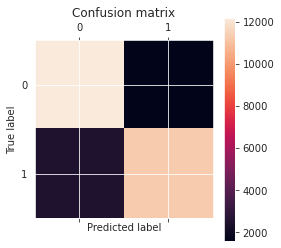

In [72]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

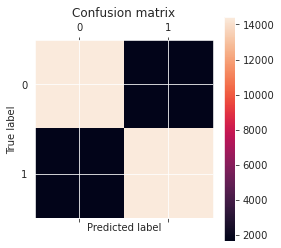

In [41]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [73]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86     13807
           1       0.88      0.82      0.85     13805

    accuracy                           0.85     27612
   macro avg       0.85      0.85      0.85     27612
weighted avg       0.85      0.85      0.85     27612



In [69]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86     13807
           1       0.88      0.82      0.85     13805

    accuracy                           0.85     27612
   macro avg       0.85      0.85      0.85     27612
weighted avg       0.85      0.85      0.85     27612



In [70]:
# Use rfpimp library to analyse the importance of each feature
# the rfpimp.importances() function only accept train and test data in the form of dataframe

x = pd.DataFrame(test_d)
y = pd.DataFrame(test_lab)
x_columns = vec.get_feature_names()
x.columns = x_columns 

                           Importance
Feature                              
Adress_Count                 0.161777
Street                       0.035564
Residential Premises         0.030132
Commercial Premises          0.023432
bef_30_365days_count         0.021512
bef_365_begindays_count      0.017565
Building Site                0.016442
bef_7_30days_count           0.015356
bef_2_7days_count            0.015319
time_cl_1                    0.011299
Weekday                      0.010611
days                         0.010539
Time                         0.009887
time_cl_2                    0.008402
time_cl_0                    0.007062
LSOA_Count                   0.006410
year_month_cl_1              0.004889
Property Alarm               0.004853
month_cl_2                   0.004781
Month                        0.004527
year_month_cl_0              0.004237
weekday_cl_3                 0.004056
Season                       0.003694
month_cl_0                   0.003622
month_cl_1  

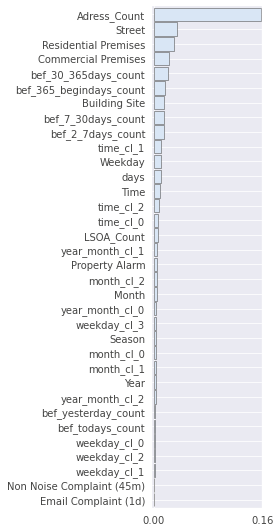

In [71]:
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

# Repeat complaint in next 7-30 days

In [25]:
# CV method to Tune the model

In [26]:
#  Defome the shift_dataset
shift_dataset = s_2.copy()

In [27]:
shift_dataset.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [28]:
shift_dataset

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,Noise_Complaint_Index,Time,Received_Date,Financial_Year,Service_Request,Service_Request_Group_Type,Service_Request_Group_Sub_Type,...,weekday_cl_3,LSOA,Unnamed: 0_x,within_high_hours,within_high_weekdays,within_high_months,Days_oneyear_label,Hours_oneweek_label,Hours_oneweek_trend_label,Days_oneyear_trend_label
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,NC1,0,4/1/2018,2018/19,Burglar/fire alarm,Noise Complaint,Property Alarm,...,0,Westminster 018C,0,0,0,1,3,0,1,1
1,1975,1,1,NC2,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,1,Westminster 021C,2070,0,1,1,4,12,1,1
2,2818,2,2,NC3,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 023C,2978,0,0,1,4,4,1,0
3,3479,3,3,NC4,0,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 016C,3685,1,0,1,5,13,0,0
4,4006,4,4,NC5,2,4/1/2018,2018/19,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 013F,4283,0,1,1,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,9252,81502,81502,NC88295,18,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10103,0,0,0,9,6,1,0
88295,9253,81503,81503,NC88296,21,3/31/2022,2021/22,Noise in the street,Noise Complaint,Street,...,1,Westminster 011B,10104,0,0,0,9,6,1,0
88296,82443,81504,81504,NC88297,21,3/31/2022,2021/22,Residential noise,Noise Complaint,Residential Premises,...,0,Westminster 014F,89348,1,0,1,3,13,0,0


In [29]:
independent_and_LSOA_columns = [ 'Unnamed: 0.1',
                                
                                 'Year', 'Month', 'Weekday','Season', 'days','Time', 
                                'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
                                
                                'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
                                
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',
 ]

    
    # Select columns from different dimensions
independent_columns = [ 
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]


independent_columns_order = [ 'Unnamed: 0.1.1',
     'Year', 'Month', 'Weekday','Season', 'days','Time', 
    'bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', 
    'year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 
    
       
       'month_cl_0', 'month_cl_1', 'month_cl_2',
    
       
       'time_cl_0', 'time_cl_1', 'time_cl_2', 
    
    
       'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 
      
    
    
        'LSOA_Count','Adress_Count',
      
                       
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street',]

In [30]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='not majority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(shift_dataset[independent_columns], shift_dataset['is_repeat_7_30days'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

# 由于这里多了一个order,但是resampled数据顺序产生变化

In [31]:
oversampled

,is_repeat_7_30days,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,bef_2_7days_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
0,0,2018,4,6,2,0,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
1,0,2018,4,6,2,0,0,0,0,0,...,1,843,1,0,0,0,0,0,1,0
2,0,2018,4,6,2,0,0,0,0,0,...,0,661,7,0,0,0,0,0,1,0
3,1,2018,4,6,2,0,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
4,0,2018,4,6,2,0,2,0,0,0,...,0,1566,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141997,1,2021,2,4,1,1057,16,0,0,0,...,0,785,4,0,0,0,0,0,0,0
141998,1,2019,3,1,2,342,10,0,0,0,...,0,2279,24,0,0,0,0,0,0,0
141999,1,2018,4,1,2,3,22,0,0,0,...,1,618,12,0,1,0,0,0,0,0
142000,1,2020,4,1,2,745,10,0,0,0,...,1,834,5,0,0,0,0,0,1,0


In [32]:
#oversampled =oversampled.merge(shift_dataset[['Unnamed: 0_x','LSOA11CD']], left_on = 'Unnamed: 0_x', right_on = 'Unnamed: 0_x' )


In [33]:


le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled['is_repeat_7_30days']) # runs LabelEncoder on the accident_count_levelcolumn

In [34]:
shift_dataset_2_dict = oversampled[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024
index = oversampled.index.values

train_d, test_d, train_lab, test_lab, train_index, test_index = train_test_split(vec_array, label_y, index, random_state=random_state_split)
len(train_d),len(test_d),len(train_lab),len(test_lab),len(train_index),len(test_index)

Number of variables in this transformed data: 34


(106501, 35501, 106501, 35501, 106501, 35501)

In [35]:
train_index

array([ 82508,  86650,  68024, ...,  19045, 100844, 113249])

In [36]:
train_d

array([[ 6.,  0.,  0., ...,  0.,  0.,  0.],
       [17.,  0.,  1., ...,  1.,  0.,  0.],
       [ 2.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [11.,  0.,  0., ...,  1.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

In [37]:
oversampled_train = oversampled.loc[train_index].sort_values(by = ['days','Time'] )
oversampled_train

,is_repeat_7_30days,Year,Month,Weekday,Season,days,Time,bef_todays_count,bef_yesterday_count,bef_2_7days_count,...,weekday_cl_3,LSOA_Count,Adress_Count,Building Site,Commercial Premises,Email Complaint (1d),Non Noise Complaint (45m),Property Alarm,Residential Premises,Street
3,1,2018,4,6,2,0,0,0,0,0,...,0,527,5,0,0,0,0,0,1,0
0,0,2018,4,6,2,0,0,0,0,0,...,0,1975,2,0,0,0,0,1,0,0
112827,1,2018,4,6,2,0,1,0,0,0,...,0,509,3,0,0,0,0,0,1,0
5,0,2018,4,6,2,0,2,0,0,0,...,0,475,4,0,1,0,0,0,0,0
4,0,2018,4,6,2,0,2,0,0,0,...,0,1566,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81501,0,2022,3,3,2,1460,16,0,0,0,...,1,1049,1,1,0,0,0,0,0,0
81504,0,2022,3,3,2,1460,21,0,0,0,...,0,354,2,0,0,0,0,0,1,0
81503,0,2022,3,3,2,1460,21,1,2,8,...,1,2139,511,0,0,0,0,0,0,1
81505,0,2022,3,3,2,1460,22,0,0,0,...,0,1975,3,0,1,0,0,0,0,0


In [38]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit([ 0,1]) # encode '0','1','2' with 0, 1, 2 respectively
# runs LabelEncoder on the accident_count_levelcolumn
label_y = le.transform(oversampled_train['is_repeat_7_30days']) # runs LabelEncoder on the accident_count_levelcolumn

shift_dataset_2_dict = oversampled_train[independent_columns].to_dict('records')
vec = DictVectorizer()  # create the DictVectorizer object
vec_array = vec.fit_transform(shift_dataset_2_dict).toarray() 
print("Number of variables in this transformed data: {}".format(vec_array.shape[1]))
random_state_split = 1024


#train_d, test_d, train_lab, test_lab = train_test_split(vec_array, label_y, random_state=random_state_split)
#len(train_d),len(test_d),len(train_lab),len(test_lab)

Number of variables in this transformed data: 34


In [39]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = vec_array
y = label_y


TS_kfold = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)

ts_kfold = TS_kfold.split(vec_array, label_y)  

train_indices, test_indices = [list(traintest) for traintest in zip(*ts_kfold)]

ts_cv = [*zip(train_indices,test_indices)]

In [40]:
ts_cv

[(array([    0,     1,     2, ..., 26623, 26624, 26625]),
  array([26626, 26627, 26628, ..., 53248, 53249, 53250])),
 (array([    0,     1,     2, ..., 53248, 53249, 53250]),
  array([53251, 53252, 53253, ..., 79873, 79874, 79875])),
 (array([    0,     1,     2, ..., 79873, 79874, 79875]),
  array([ 79876,  79877,  79878, ..., 106498, 106499, 106500]))]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = [ 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [42]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune

random_state_RF = 200

rf = RandomForestClassifier(random_state = random_state_RF)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='accuracy', 
                              cv = ts_cv, verbose=2, random_state=random_state_RF, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, y);

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 7s, sys: 1.16 s, total: 1min 8s
Wall time: 7min


RandomizedSearchCV(cv=[(array([    0,     1,     2, ..., 26623, 26624, 26625]),
                        array([26626, 26627, 26628, ..., 53248, 53249, 53250])),
                       (array([    0,     1,     2, ..., 53248, 53249, 53250]),
                        array([53251, 53252, 53253, ..., 79873, 79874, 79875])),
                       (array([    0,     1,     2, ..., 79873, 79874, 79875]),
                        array([ 79876,  79877,  79878, ..., 106498, 106499, 106500]))],
                   estimator=RandomForestClassifier(random_state=200),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples

In [43]:
print ("The best parameter value is: ")
print (rf_random.best_params_)
print ("The best score is: ")
print (rf_random.best_score_)

The best parameter value is: 
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 70, 'bootstrap': True}
The best score is: 
0.8065352112676057


In [44]:
# 最佳参数{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

random_state_RF = 200
forest_clf = RandomForestClassifier(n_estimators =600, min_samples_split=2, min_samples_leaf=4, max_features='log2', max_depth=70, bootstrap=True, random_state = random_state_RF)
forest_clf.fit(train_d,train_lab)
print("The accuracy of this classifier on the train data is:{}".format(forest_clf.score(train_d, train_lab)))
print("The accuracy of this classifier on the test data is:{}".format(forest_clf.score(test_d, test_lab)))

[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.2min
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time= 1.3min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  29.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time= 1.5min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time= 2.7min
[CV] END bootstrap=False, max_depth=20, max

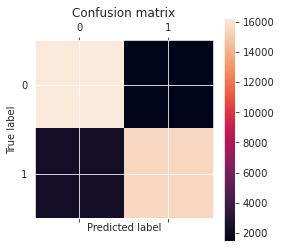

In [45]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

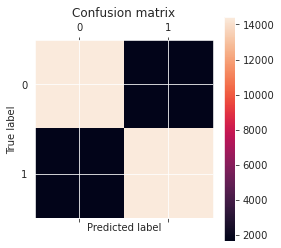

In [41]:
# visualize the classification result with confusion matrix
predictions = forest_clf.predict(test_d)
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     17756
           1       0.91      0.87      0.89     17745

    accuracy                           0.90     35501
   macro avg       0.90      0.90      0.90     35501
weighted avg       0.90      0.90      0.90     35501



In [69]:
print (metrics.classification_report(test_lab, predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86     13807
           1       0.88      0.82      0.85     13805

    accuracy                           0.85     27612
   macro avg       0.85      0.85      0.85     27612
weighted avg       0.85      0.85      0.85     27612



In [47]:
# Use rfpimp library to analyse the importance of each feature
# the rfpimp.importances() function only accept train and test data in the form of dataframe

x = pd.DataFrame(test_d)
y = pd.DataFrame(test_lab)
x_columns = vec.get_feature_names()
x.columns = x_columns 

[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=  29.5s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 3.7min
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 4.1min
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.3min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  53.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.1min
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.8s
[CV] END bootstrap=False, max_depth=80, 

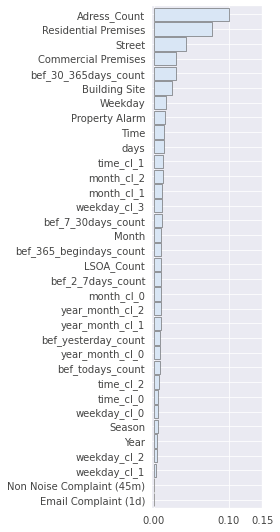

In [48]:
imp = rfpimp.importances(forest_clf, x, y, n_samples=-1) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

In [59]:
importance_collection = pd.read_csv('RF_model_importance_timeseries_ordinary.csv')

In [60]:
importance_collection

,Feature,Importance,Type
0,Adress_Count,0.103772,7-30 days
1,Residential Premises,0.080758,7-30 days
2,Street,0.045182,7-30 days
3,Commercial Premises,0.030760,7-30 days
4,bef_30_365days_count,0.030140,7-30 days
...,...,...,...
97,bef_todays_count,0.003550,0-2 days
98,bef_yesterday_count,0.002865,0-2 days
99,weekday_cl_1,0.001837,0-2 days
100,Non Noise Complaint (45m),0.000156,0-2 days


In [61]:
A = ['LSOA_Count','Adress_Count',
      'Building Site', 'Commercial Premises', 'Email Complaint (1d)','Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises','Street']

B = ['Year', 'Month', 'Weekday','Season', 'days','Time',]
   
C = ['bef_todays_count','bef_yesterday_count', 'bef_2_7days_count', 'bef_7_30days_count','bef_30_365days_count', 'bef_365_begindays_count', ]

D = ['year_month_cl_0', 'year_month_cl_1','year_month_cl_2', 'month_cl_0', 'month_cl_1', 'month_cl_2',
      
       'time_cl_0', 'time_cl_1', 'time_cl_2', 'weekday_cl_0', 'weekday_cl_1','weekday_cl_2', 'weekday_cl_3', 'weekday_cl_4', 'weekday_cl_5']
      
    
    

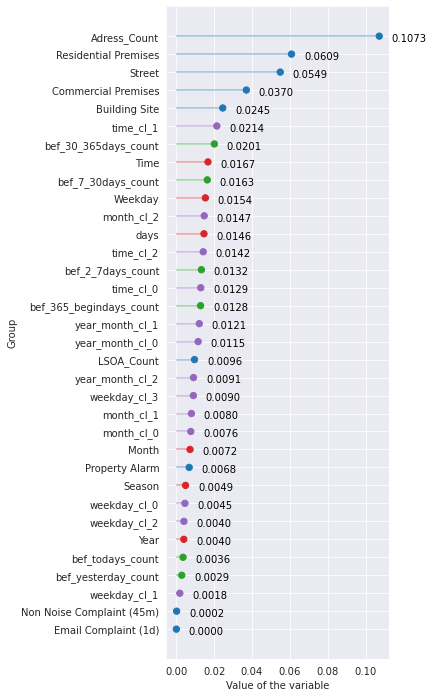

In [62]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

In [63]:
df = importance_collection.loc[importance_collection.Type=='0-2 days'].reset_index()
df

,index,Feature,Importance,Type
0,68,Adress_Count,0.107264,0-2 days
1,69,Residential Premises,0.060871,0-2 days
2,70,Street,0.054924,0-2 days
3,71,Commercial Premises,0.036990,0-2 days
4,72,Building Site,0.024535,0-2 days
5,73,time_cl_1,0.021422,0-2 days
6,74,bef_30_365days_count,0.020083,0-2 days
7,75,Time,0.016720,0-2 days
8,76,bef_7_30days_count,0.016346,0-2 days
9,77,Weekday,0.015350,0-2 days


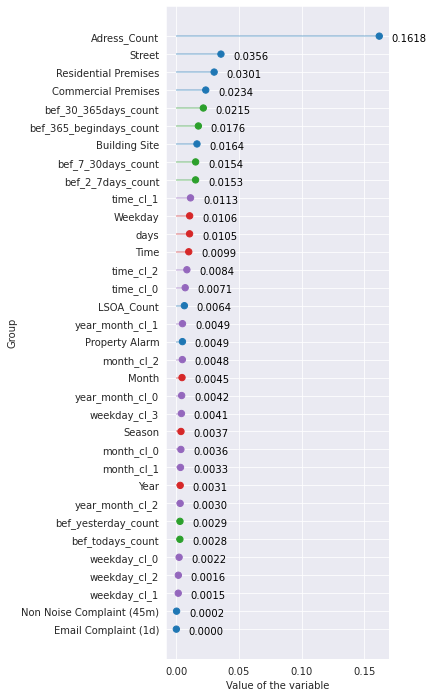

In [64]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='2-7 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# show the graph
plt.show()

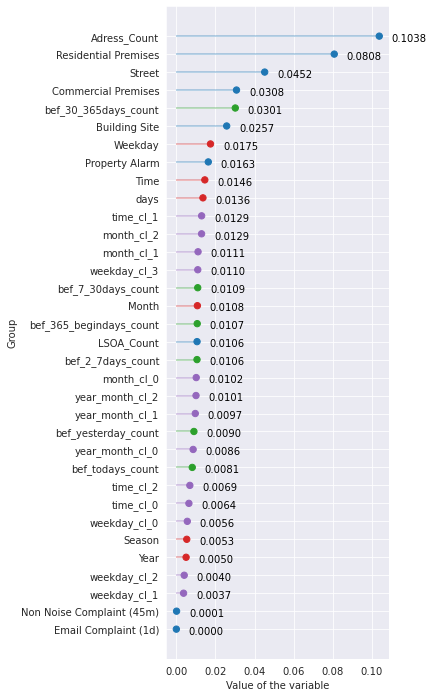

In [65]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(4, 12)) 
# Create a dataframe
df = importance_collection.loc[importance_collection.Type=='7-30 days'].reset_index()
 
# Reorder it based on values:
ordered_df = df.sort_values(by='Importance')
my_range=range(1,len(df.index)+1)
y_list = [*range(1,len(df.index)+1)]
y_list = list(reversed(y_list))
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Feature'].isin(A), 'tab:blue', np.where(ordered_df ['Feature'].isin(B),'tab:red',np.where(ordered_df ['Feature'].isin(C),'tab:green','tab:purple')))
my_size=np.where(ordered_df ['Feature'].isin(A), 40, 40)
 
# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Importance'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['Importance'], my_range, color=my_color, s=my_size, alpha=1)
 
    
for i in range(len(df['Importance'])):
    label = "{:.4f}".format(df['Importance'][i])
    plt.annotate(str(label), # this is the text
                 (df['Importance'][i], y_list[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  
    
    
# Add title and axis names
plt.yticks(my_range, ordered_df['Feature'])
#plt.title("What about the B group?", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')
#plt.legend(['A','B','C','D'])
# show the graph
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier
random_state_RF = 200
rf = RandomForestClassifier(random_state = random_state_RF)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 200,
 'verbose': 0,
 'warm_start': False}
